In [ ]:
#Import tensorflow and other libraries
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, MaxPooling2D, Flatten,
                                     Dropout, BatchNormalization)
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Network parameters

NUM_CLASSES = 10

#Reshape 28*28 pixel images to a "flatten" array of 784 pixels
RESHAPED = 784

#Number of neurons is a hidden layer
HIDDEN_NEURONS = 256

#Input image dimensions
IMG_ROWS, IMG_COLS = 28, 28 #Input image dimensions

INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)

In [ ]:
#load the fashion MNIST dataset
fashion_data = tf.keras.datasets.fashion_mnist

#Split between 60,000 train samples and 10,000 test samples
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

#Reshape
train_images = train_images.reshape(60000, IMG_ROWS, IMG_COLS, 1)
test_images = test_images.reshape(10000, IMG_ROWS, IMG_COLS, 1)

train_images, test_images = train_images / 255.0, test_images / 255.0

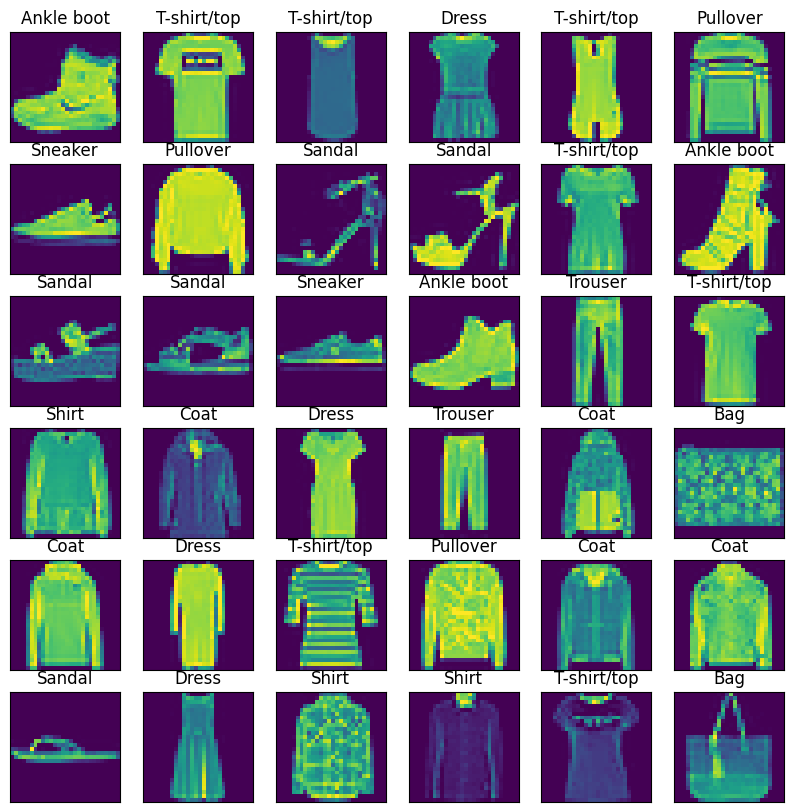

In [ ]:
#Visualization

#Create a dictionary for each type of label
labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
          5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape((IMG_ROWS,IMG_COLS)))
    label_index = train_labels[i]
    plt.title(labels[label_index])
plt.show()

In [ ]:
#One-Hot representation of labels

train_labels = tf.keras.utils.to_categorical(train_labels, NUM_CLASSES)
test_labels = tf.keras.utils.to_categorical(test_labels, NUM_CLASSES)

In [ ]:
#define the architecture of our convolutional neural network
class cnn_fmnist:
  @staticmethod
  def build(input_shape, classes, use_l2_reg=False, l2_loss_lambda=0.00025):
    l2 = regularizers.l2(l2_loss_lambda) if use_l2_reg else None # this line had an extra indent
    #printing this as we cannot 'visualize' L2 Normalization
    #applied to a layer
    model = Sequential([

        #CONV => RELU => POOL
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',
               kernel_regularizer=l2, input_shape= input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.15),

        #CONV => RELU => POOL
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same',
              kernel_regularizer=l2), # this line was missing an indent
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.2),

        #CONV => RELU => POOL
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same',
              kernel_regularizer=l2), # this line was missing an indent
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.3),

        Flatten(),
        Dropout(0.4),

        Dense(1024, activation='relu', kernel_regularizer=l2),
        Dropout(0.4),

        Dense(512, activation='relu', kernel_regularizer=l2),
        Dropout(0.2),

        Dense(NUM_CLASSES, activation='softmax')
    ])
    return model

In [ ]:
#Initialize the optimizer and model
model = cnn_fmnist.build(input_shape= INPUT_SHAPE, classes=NUM_CLASSES,
                         use_l2_reg=True)

adam = Adam(learning_rate=0.0001)


#Compile the model

model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_9 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_10 (Ba  (None, 14, 14, 64)       

In [ ]:
#Training parameters

BATCH_SIZE = 128
EPOCHS = 50
VALIDATION_SPLIT = 0.2 #How much of the training set is reserved for validation

In [31]:
#Training the model

history = model.fit(
    train_images, train_labels,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = VALIDATION_SPLIT,
    verbose = 1
)

Epoch 1/50
375/375 [==============================] - 129s 344ms/step - loss: 0.9394 - accuracy: 0.8194 - val_loss: 1.0397 - val_accuracy: 0.7771
Epoch 2/50
375/375 [==============================] - 124s 332ms/step - loss: 0.7720 - accuracy: 0.8578 - val_loss: 0.6605 - val_accuracy: 0.8862
Epoch 3/50
375/375 [==============================] - 129s 345ms/step - loss: 0.6702 - accuracy: 0.8744 - val_loss: 0.6087 - val_accuracy: 0.8817
Epoch 4/50
375/375 [==============================] - 127s 340ms/step - loss: 0.5939 - accuracy: 0.8838 - val_loss: 0.5224 - val_accuracy: 0.9032
Epoch 5/50
375/375 [==============================] - 133s 356ms/step - loss: 0.5504 - accuracy: 0.8895 - val_loss: 0.4896 - val_accuracy: 0.9033
Epoch 6/50
375/375 [==============================] - 130s 347ms/step - loss: 0.5137 - accuracy: 0.8945 - val_loss: 0.4614 - val_accuracy: 0.9108
Epoch 7/50
375/375 [==============================] - 131s 348ms/step - loss: 0.4865 - accuracy: 0.8977 - val_loss: 0.4776 -

In [33]:
score = model.evaluate(test_images, test_labels)
print('\nTest loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 8s 25ms/step - loss: 0.4330 - accuracy: 0.9005

Test loss: 0.43299800157546997
Test accuracy: 0.9004999995231628


Text(0.5, 1.0, 'Train - Accuracy')

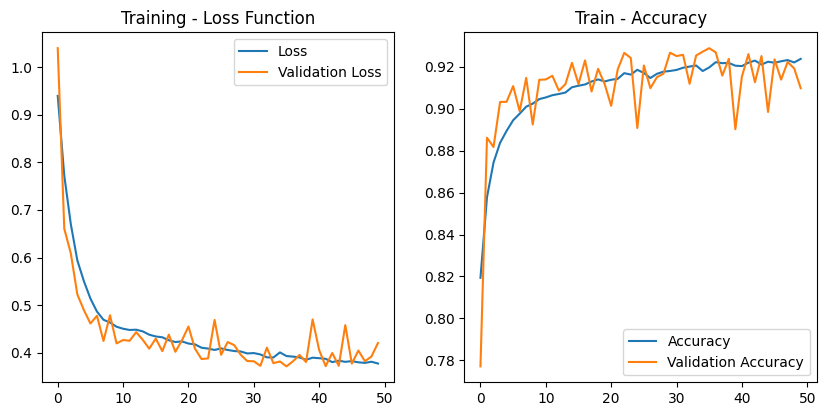

In [34]:
#plot the loss and accuracy functions for the training and validation sets

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label ='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label ='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
#get the predictions for the test data, convert to an integer value between 0 and 9
predicted_classes = np.around(model.predict(test_images))
predicted_classes = np.argmax(predicted_classes, axis=1)


#get the indices to be plotted
test_labels = np.argmax(test_labels, axis=1)

correct = np.nonzero(predicted_classes == test_labels)[0]
incorrect = np.nonzero(predicted_classes != test_labels)[0]

313/313 [==============================] - 1s 2ms/step


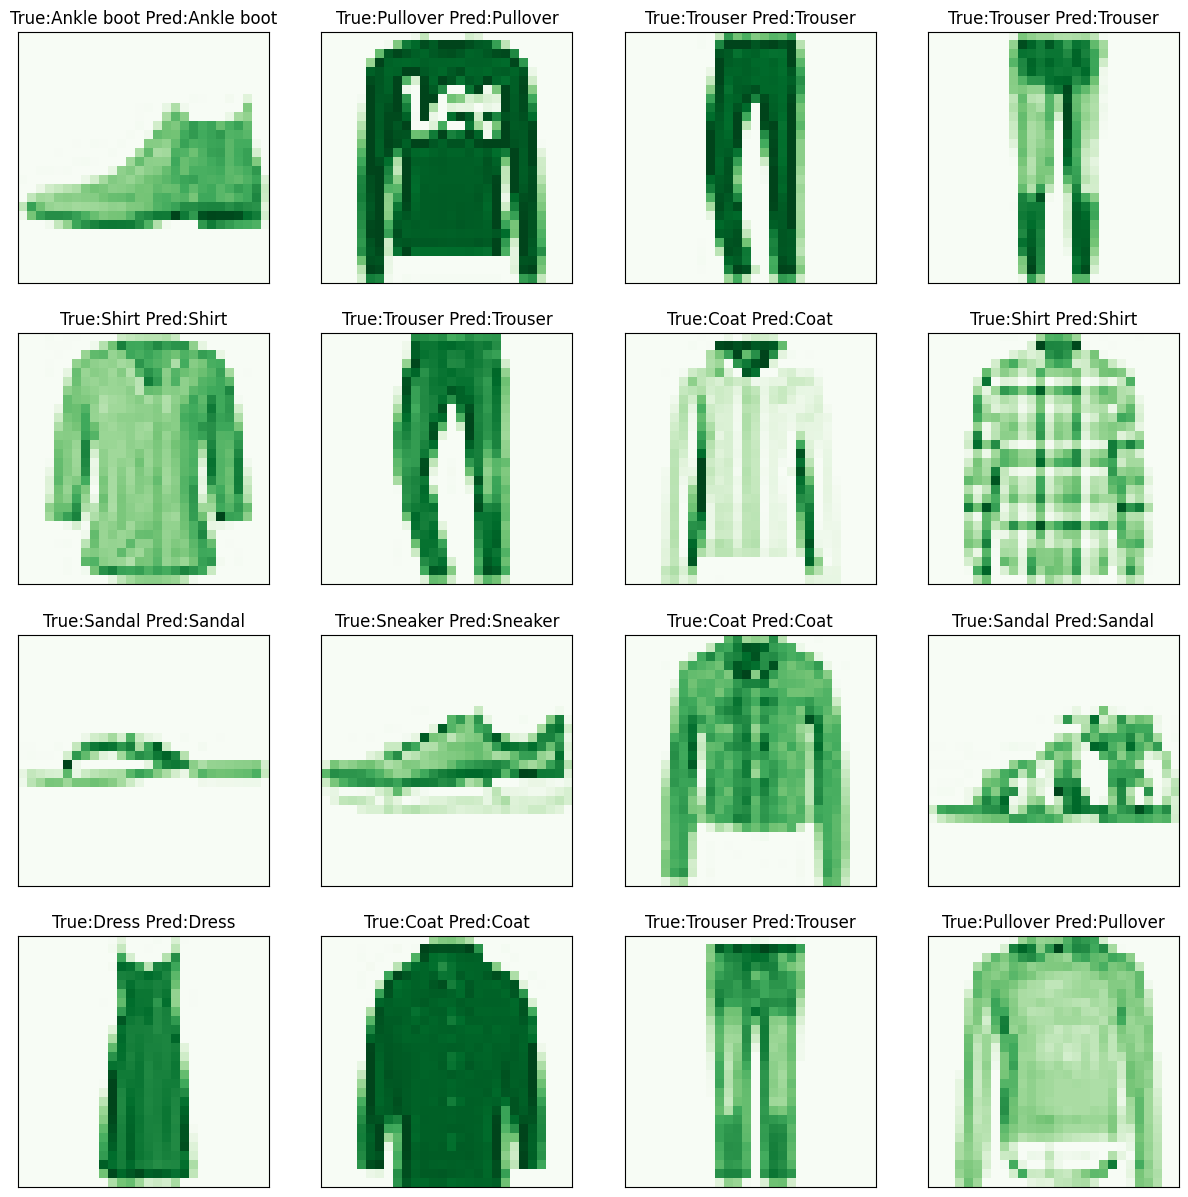

In [ ]:
#Plot 16 correctly predicted image and their labels


plt.figure(figsize=(15,15))
for i, indx in enumerate(correct[:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[indx].reshape((IMG_ROWS,IMG_COLS)), cmap = "Greens")
    label_index = test_labels[indx]
    plt.title("True:{} Pred:{}".format(labels[test_labels[indx]],labels[predicted_classes[indx]]))
plt.show()

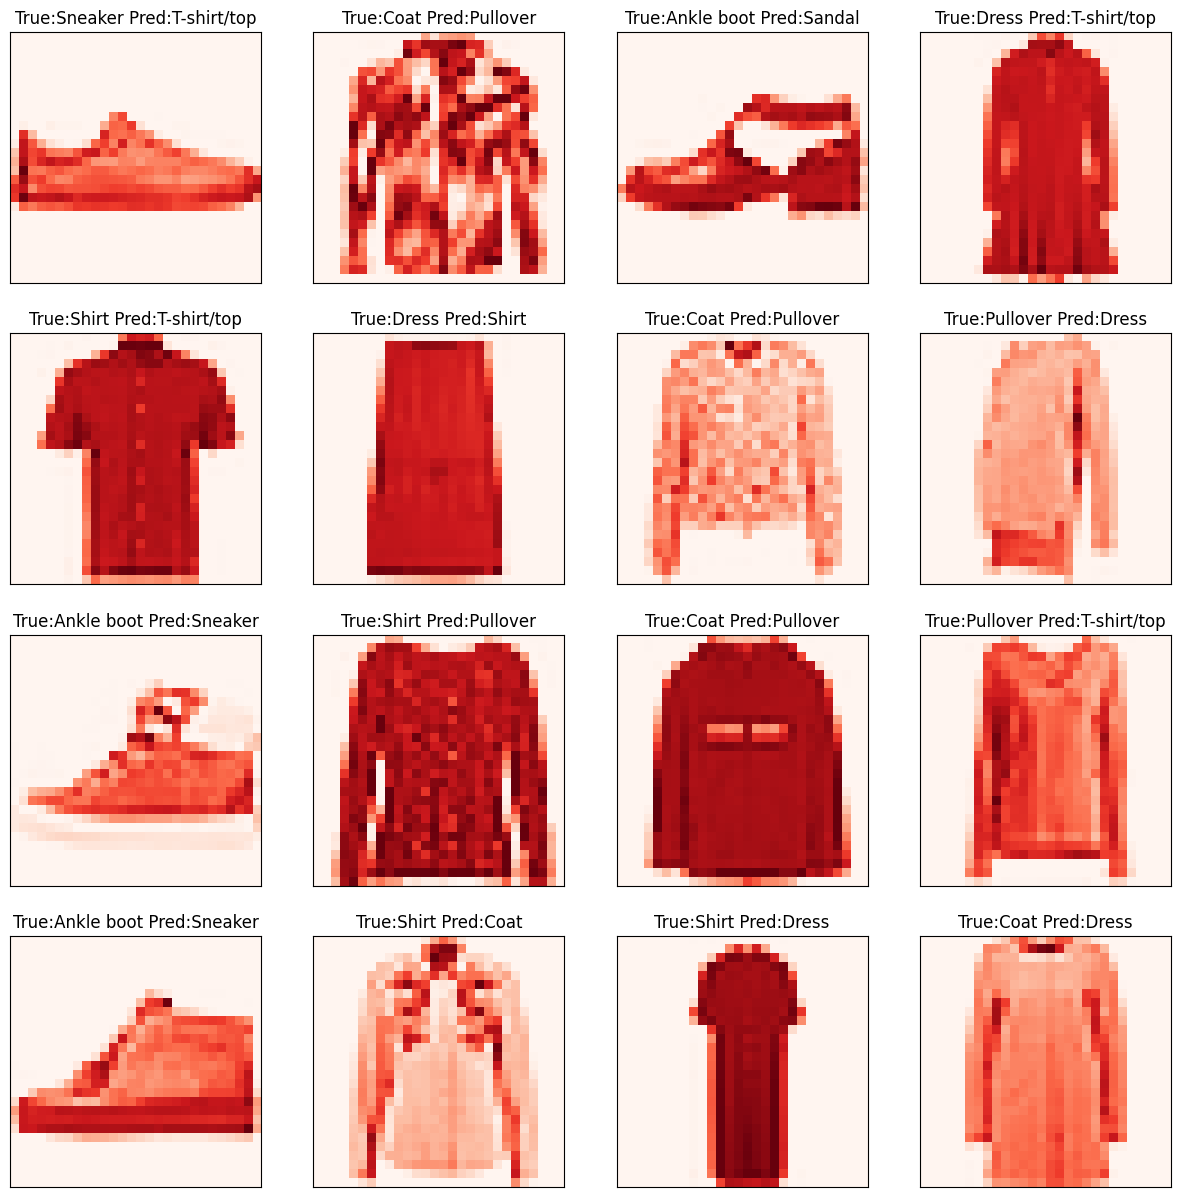

In [ ]:
#Plot 16 incorrectly predicted images and their true labels

plt.figure(figsize=(15,15))
for i, indx in enumerate(incorrect[:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[indx].reshape((IMG_ROWS,IMG_COLS)), cmap = "Reds")
    label_index = test_labels[indx]
    plt.title("True:{} Pred:{}".format(labels[test_labels[indx]],labels[predicted_classes[indx]]))
plt.show()

In [ ]:
#Network parameters

NUM_CLASSES = 10

#Reshape 28*28 pixel images to a "flatten" array of 784 pixels
RESHAPED = 784

#Number of neurons is a hidden layer
HIDDEN_NEURONS = 256


In [ ]:
#load the fashion MNIST dataset
fashion_data = tf.keras.datasets.fashion_mnist

#Split between 60,000 train samples and 10,000 test samples
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

train_images = train_images.reshape(60000, RESHAPED)
test_images = test_images.reshape(10000, RESHAPED)

train_images, test_images = train_images / 255.0, test_images / 255.0

#One-Hot representation of labels

train_labels = tf.keras.utils.to_categorical(train_labels, NUM_CLASSES)
test_labels = tf.keras.utils.to_categorical(test_labels, NUM_CLASSES)

In [ ]:
#define the architecture of our convolutional neural network
class cnn_fmnist:
  @staticmethod
  def build(input_shape, classes):
    model = Sequential([
        Dense(HIDDEN_NEURONS, input_shape=input_shape,
              name = 'Dense_layer1', activation='relu'),
        Dense(HIDDEN_NEURONS, name = 'Dense_layer2', activation='relu'),
        Dense(classes, name = 'output_layer', activation='softmax')
    ])
    return model

In [ ]:
model = cnn_fmnist.build(input_shape=(RESHAPED,), classes=NUM_CLASSES)


#Compile the model

model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_layer1 (Dense)        (None, 256)               200960    
                                                                 
 Dense_layer2 (Dense)        (None, 256)               65792     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Training parameters

BATCH_SIZE = 128
EPOCHS = 200
VALIDATION_SPLIT = 0.2 #How much of the training set is reserved for validation

In [ ]:
model.fit(train_images, train_labels, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = VALIDATION_SPLIT)

Epoch 1/200
375/375 [==============================] - 2s 4ms/step - loss: 1.1496 - accuracy: 0.6499 - val_loss: 0.7556 - val_accuracy: 0.7517
Epoch 2/200
375/375 [==============================] - 1s 4ms/step - loss: 0.6830 - accuracy: 0.7761 - val_loss: 0.6151 - val_accuracy: 0.7947
Epoch 3/200
375/375 [==============================] - 1s 3ms/step - loss: 0.5867 - accuracy: 0.8044 - val_loss: 0.5586 - val_accuracy: 0.8082
Epoch 4/200
375/375 [==============================] - 2s 5ms/step - loss: 0.5388 - accuracy: 0.8194 - val_loss: 0.5204 - val_accuracy: 0.8224
Epoch 5/200
375/375 [==============================] - 1s 4ms/step - loss: 0.5076 - accuracy: 0.8264 - val_loss: 0.4966 - val_accuracy: 0.8292
Epoch 6/200
375/375 [==============================] - 1s 4ms/step - loss: 0.4876 - accuracy: 0.8325 - val_loss: 0.4800 - val_accuracy: 0.8322
Epoch 7/200
375/375 [==============================] - 1s 3ms/step - loss: 0.4724 - accuracy: 0.8365 - val_loss: 0.4687 - val_accuracy: 0.8377

In [ ]:
#Evaluate the model

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3566 - accuracy: 0.8857
Test accuracy: 0.885699987411499


In [ ]:
#Compile the model using RMSProp optimizer

model = cnn_fmnist.build(input_shape=(RESHAPED,), classes=NUM_CLASSES)
model.compile(optimizer = 'RMSprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_layer1 (Dense)        (None, 256)               200960    
                                                                 
 Dense_layer2 (Dense)        (None, 256)               65792     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(train_images, train_labels, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = VALIDATION_SPLIT)

Epoch 1/200
375/375 [==============================] - 3s 4ms/step - loss: 0.5749 - accuracy: 0.7904 - val_loss: 0.4530 - val_accuracy: 0.8351
Epoch 2/200
375/375 [==============================] - 1s 3ms/step - loss: 0.3937 - accuracy: 0.8539 - val_loss: 0.3830 - val_accuracy: 0.8646
Epoch 3/200
375/375 [==============================] - 2s 4ms/step - loss: 0.3454 - accuracy: 0.8713 - val_loss: 0.3403 - val_accuracy: 0.8760
Epoch 4/200
375/375 [==============================] - 2s 5ms/step - loss: 0.3179 - accuracy: 0.8823 - val_loss: 0.3207 - val_accuracy: 0.8847
Epoch 5/200
375/375 [==============================] - 1s 4ms/step - loss: 0.2976 - accuracy: 0.8888 - val_loss: 0.3262 - val_accuracy: 0.8839
Epoch 6/200
375/375 [==============================] - 1s 4ms/step - loss: 0.2818 - accuracy: 0.8943 - val_loss: 0.3282 - val_accuracy: 0.8842
Epoch 7/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2670 - accuracy: 0.8984 - val_loss: 0.3106 - val_accuracy: 0.8864

In [ ]:
#Evaluate the model

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 2.1765 - accuracy: 0.8882
Test accuracy: 0.8881999850273132


In [ ]:
#Compile the model using Adam Optimizer

model = cnn_fmnist.build(input_shape=(RESHAPED,), classes=NUM_CLASSES)
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_layer1 (Dense)        (None, 256)               200960    
                                                                 
 Dense_layer2 (Dense)        (None, 256)               65792     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(train_images, train_labels, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = VALIDATION_SPLIT)

Epoch 1/200
375/375 [==============================] - 3s 4ms/step - loss: 0.5281 - accuracy: 0.8157 - val_loss: 0.4491 - val_accuracy: 0.8403
Epoch 2/200
375/375 [==============================] - 1s 4ms/step - loss: 0.3761 - accuracy: 0.8633 - val_loss: 0.3642 - val_accuracy: 0.8701
Epoch 3/200
375/375 [==============================] - 1s 3ms/step - loss: 0.3353 - accuracy: 0.8757 - val_loss: 0.3456 - val_accuracy: 0.8731
Epoch 4/200
375/375 [==============================] - 1s 3ms/step - loss: 0.3112 - accuracy: 0.8845 - val_loss: 0.3480 - val_accuracy: 0.8755
Epoch 5/200
375/375 [==============================] - 1s 4ms/step - loss: 0.2887 - accuracy: 0.8929 - val_loss: 0.3216 - val_accuracy: 0.8811
Epoch 6/200
375/375 [==============================] - 2s 5ms/step - loss: 0.2714 - accuracy: 0.8985 - val_loss: 0.3298 - val_accuracy: 0.8793
Epoch 7/200
375/375 [==============================] - 2s 5ms/step - loss: 0.2580 - accuracy: 0.9043 - val_loss: 0.3314 - val_accuracy: 0.8830

In [ ]:
#Evaluate the model

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.1199 - accuracy: 0.8903
Test accuracy: 0.8902999758720398


In [ ]:
#initialize the optimizer and model
model = cnn_fmnist.build(input_shape=(RESHAPED,), classes=NUM_CLASSES)

#Compile the model
model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Training the model

BATCH_SIZE = 128
EPOCHS = 200
VALIDATION_SPLIT = 0.2 #How much of the training set is reserved for validation

model.fit(train_images, train_labels, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = VALIDATION_SPLIT)

Epoch 1/200
375/375 [==============================] - 2s 4ms/step - loss: 1.2342 - accuracy: 0.6259 - val_loss: 0.8941 - val_accuracy: 0.7204
Epoch 2/200
375/375 [==============================] - 1s 3ms/step - loss: 0.8221 - accuracy: 0.7392 - val_loss: 0.7553 - val_accuracy: 0.7592
Epoch 3/200
375/375 [==============================] - 1s 3ms/step - loss: 0.7281 - accuracy: 0.7689 - val_loss: 0.6919 - val_accuracy: 0.7798
Epoch 4/200
375/375 [==============================] - 1s 3ms/step - loss: 0.6775 - accuracy: 0.7847 - val_loss: 0.6540 - val_accuracy: 0.7915
Epoch 5/200
375/375 [==============================] - 1s 3ms/step - loss: 0.6439 - accuracy: 0.7941 - val_loss: 0.6267 - val_accuracy: 0.7970
Epoch 6/200
375/375 [==============================] - 1s 3ms/step - loss: 0.6195 - accuracy: 0.8015 - val_loss: 0.6053 - val_accuracy: 0.8050
Epoch 7/200
375/375 [==============================] - 1s 4ms/step - loss: 0.6005 - accuracy: 0.8072 - val_loss: 0.5899 - val_accuracy: 0.8087

In [ ]:
#Evaluate the model

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3566 - accuracy: 0.8857
Test accuracy: 0.885699987411499
